In [6]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import lib

In [10]:
# X = np.random.rand(1000,2)
# Y1 = np.zeros(1000)
# Y2 = np.zeros(1000)
# Y1[X[:,0]<X[:,1]]=int(1)
# Y2[X[:,0]>1-X[:,1]]=int(1)
# Y = Y1*Y2
# Y = Y.astype(int)
X,Y = lib.generate_circle()
Y = Y.astype(int)

In [18]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn_oblique_tree.oblique import ObliqueTree

random_state = 2

#see Murthy, et all for details.
#For oblique with consideration of axis parallel
#tree = ObliqueTree(splitter="oc1, axis_parallel", number_of_restarts=20, max_perturbations=5, random_state=random_state)
#
#For multivariate CART select 'cart' splitter
#tree = ObliqueTree(splitter="cart", number_of_restarts=20, max_perturbations=5, random_state=random_state)

#consider only oblique splits
tree = ObliqueTree(splitter="oc1", number_of_restarts=20, max_perturbations=5, random_state=random_state)

tree.fit(X,Y)

# X_train, X_test, y_train, y_test = train_test_split(*load_iris(return_X_y=True), test_size=.4, random_state=random_state)

# tree.fit(X_train, y_train)

predictions = tree.predict(X)

print("Iris Accuracy:",accuracy_score(Y, predictions))

Iris Accuracy: 1.0


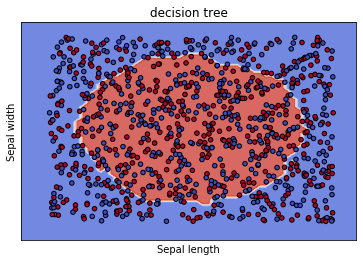

In [17]:
title = "decision tree"
# titles = ('SVC with linear kernel',
#           'LinearSVC (linear kernel)',
#           'SVC with RBF kernel',
#           'SVC with polynomial (degree 3) kernel')

# # Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax= sub

X0, X1 = X[:, 0], X[:, 1]
xx, yy = lib.make_meshgrid(X0, X1)

# for clf, title, ax in zip(models, titles, sub.flatten()):
lib.plot_contours(ax, tree, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()